# LetsGrowMore
# Data Science Internship
## Author: Tamanna Choithani
### Task-1 Iris Classification

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df=pd.read_csv(r'C:\Users\Tamanna\Downloads\Iris.csv')

In [48]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [50]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [51]:
df.shape

(150, 6)

In [52]:
df.size

900

In [53]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [54]:
df.drop('Id',inplace=True,axis=1)

In [55]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

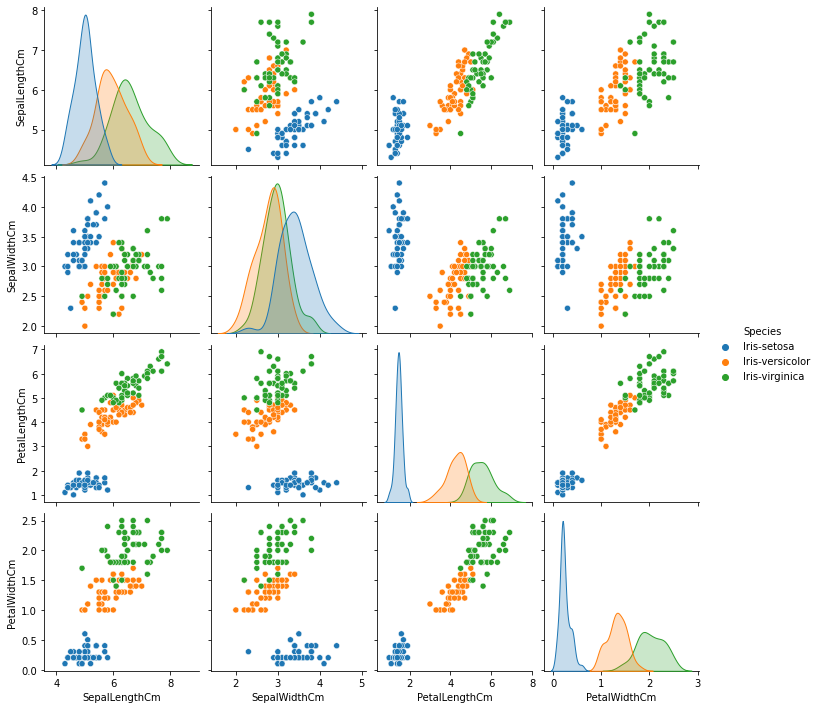

In [56]:
sns.pairplot(df,hue='Species')

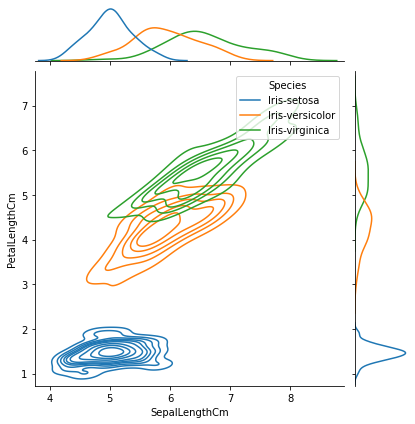

In [57]:
sns.jointplot(x='SepalLengthCm',y='PetalLengthCm',data=df,kind='kde',hue='Species')

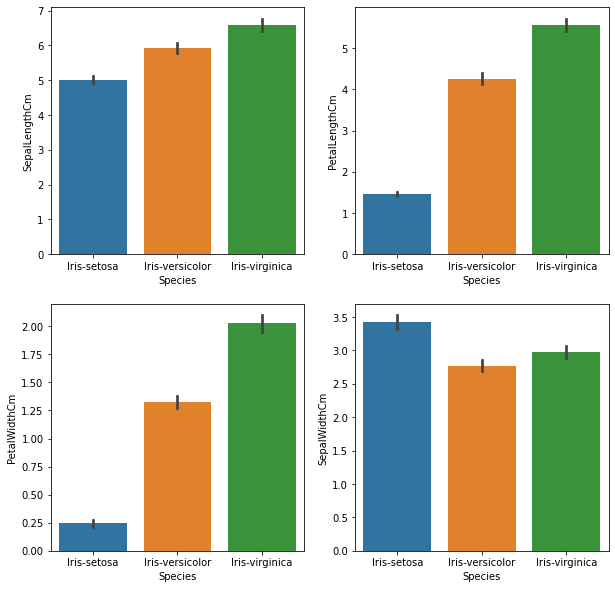

In [58]:
def barplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    sns.barplot(x=df.Species,y=df['SepalLengthCm'],ax=axes[0][0])
    sns.barplot(x=df.Species,y=df['PetalLengthCm'],ax=axes[0][1])
    sns.barplot(x=df.Species,y=df['PetalWidthCm'],ax=axes[1][0])
    sns.barplot(x=df.Species,y=df['SepalWidthCm'],ax=axes[1][1])
    plt.show()
    
barplots()

<AxesSubplot:>

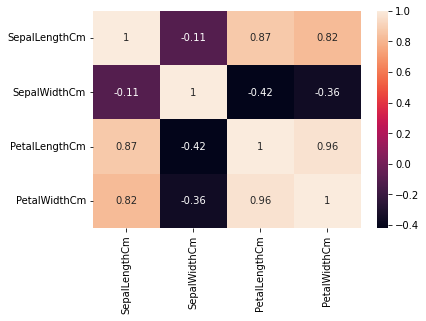

In [59]:
sns.heatmap(df.corr(),annot=True)

In [60]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
X=df.iloc[:,4].values
d=df.iloc[:,4]=lb.fit_transform(X)
d

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [63]:
from sklearn.model_selection  import train_test_split
x=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df['Species']
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

### KNN

1.0
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       1.00      1.00      1.00         8
   Verginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



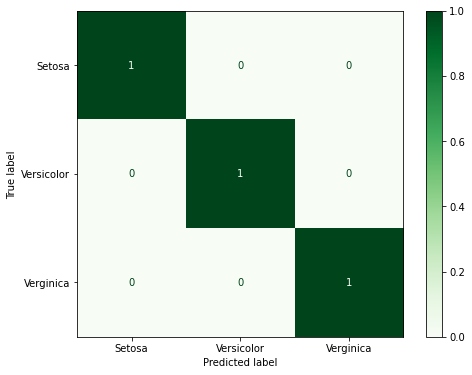

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)
accuracy=accuracy_score(Y_test,prediction)
print(accuracy)
target_names=['Setosa','Versicolor','Verginica']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap="Greens")

### Decision Tree

0.9333333333333333
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.88      0.88      0.88         8
   Verginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



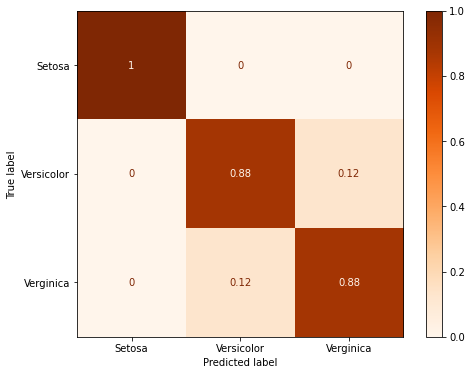

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
clf=DecisionTreeRegressor()
clf.fit(X_train,Y_train)
prediction=clf.predict(X_test)
accuracy=accuracy_score(Y_test,prediction)
print(accuracy)
target_names=['Setosa','Versicolor','Verginica']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap="Oranges")

### Logistic Regression

0.9666666666666667
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       1.00      0.88      0.93         8
   Verginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



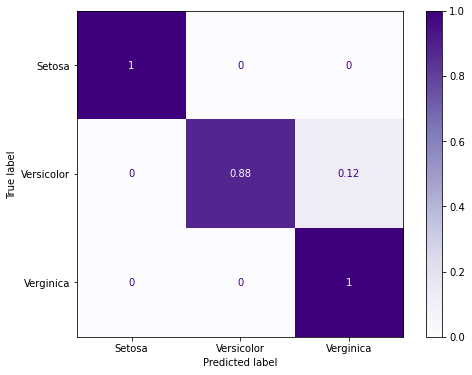

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
lgr=LogisticRegression()
lgr.fit(X_train,Y_train)
prediction=lgr.predict(X_test)
accuracy=accuracy_score(Y_test,prediction)
print(accuracy)
target_names=['Setosa','Versicolor','Verginica']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap="Purples")